<a href="https://colab.research.google.com/github/Roozbeh96/CSCI-5525-Final-Project/blob/Main/Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [4]:
train.drop(['id'], axis = 1, inplace = True)

In [21]:
train.head()

,text,author
0,"This process, however, afforded me no means of...",EAP
1,It never once occurred to me that the fumbling...,HPL
2,"In his left hand was a gold snuff box, from wh...",EAP
3,How lovely is spring As we looked from Windsor...,MWS
4,"Finding nothing else, not even gold, the Super...",HPL


In [6]:
train['text'].apply(lambda x:len(str(x).split())).max()

861

In [14]:
train.describe()

,text,author
count,19579,19579
unique,19579,3
top,"This process, however, afforded me no means of...",EAP
freq,1,7900


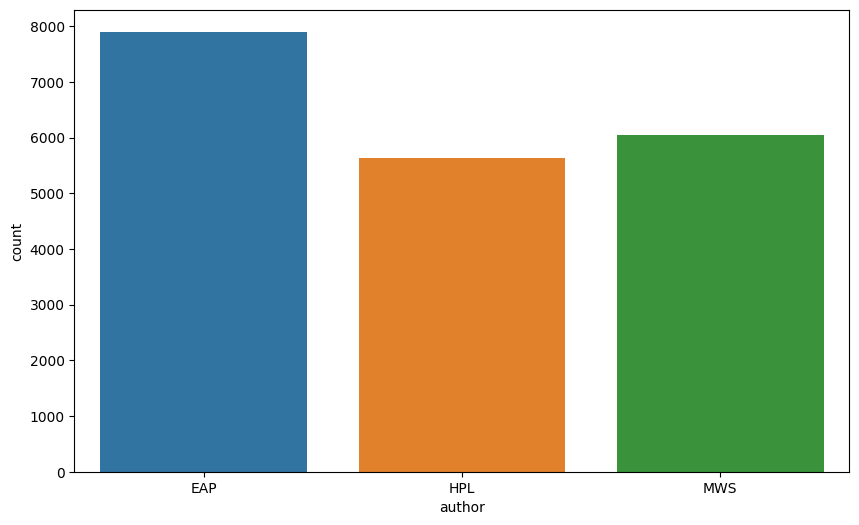

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='author',hue='author', data = train)
plt.show()

In [67]:
from plotly import graph_objs as go
temp = train.groupby('author').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,author,text
0,EAP,7900
2,MWS,6044
1,HPL,5635


In [68]:
fig = go.Figure(go.Funnelarea(
    text =temp.author,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Authors Distribution"}
    ))
fig.show()

In [7]:
from wordcloud import WordCloud, STOPWORDS

In [63]:
# Join all text together and space them with '' which is space to count for word cloud
text_data = ''.join(train['text'].dropna())


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    stopwords=STOPWORDS,
    max_words=200
).generate(text_data)



In [62]:
text_data_LOP = 'LOP'.join(train['text'].dropna())
print(text_data_LOP[0:250])

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.LOPIt never once oc


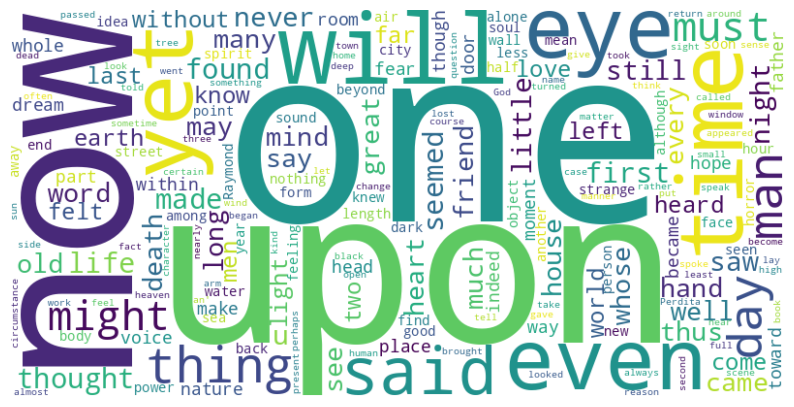

In [55]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:
A = 10